In [3]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

with open('expdist_A100.json','r') as fh:
    data = json.loads(fh.read())
    
cache = data['cache']

In [3]:
cache_as_list = list(cache.values())

In [1]:
cache_as_list[0]

NameError: name 'cache_as_list' is not defined

In [4]:
new_cache = []
for i, c in enumerate(cache_as_list):
    if 'GFLOP/s' in c:
        c['old_time'] = np.average(c['times'])
        c['time'] = 1e5 / c['GFLOP/s']
        
        #print(c)
        new_cache.append(c)
    else:
        new_cache.append(c)
    

    

In [5]:
data = {}
data['GFLOP/s'] = [c['GFLOP/s'] for c in new_cache if 'GFLOP/s' in c]
data['time'] = [c['time'] for c in new_cache if 'GFLOP/s' in c]
data['old_time'] = [c['old_time'] for c in new_cache if 'GFLOP/s' in c]

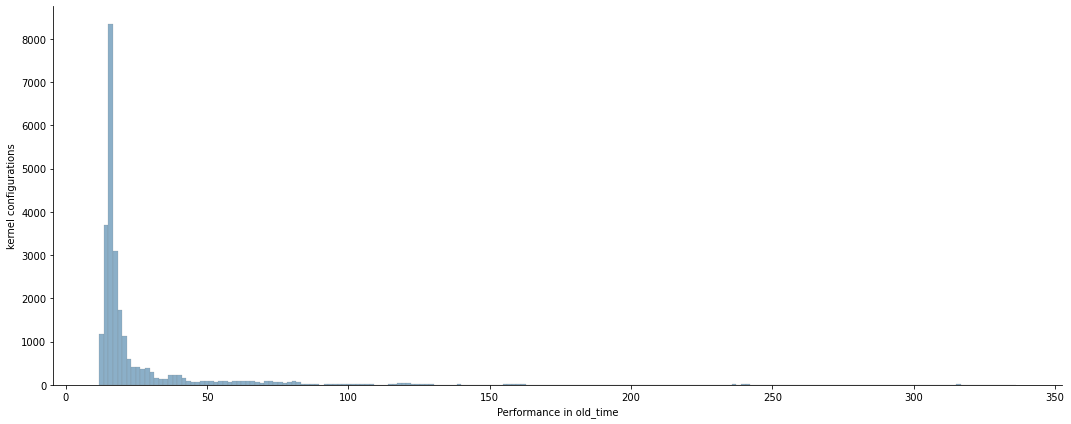

In [6]:
def histogram(metric):
    f, ax = plt.subplots(figsize=(15, 6))

    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.xlabel("Performance in " + metric)

    plt.hist(data[metric], bins=200, color="#8BAFC8", linewidth=0.15, edgecolor="#757575")
    plt.ylabel("kernel configurations")
    f.tight_layout()

histogram('old_time')

In [11]:
new_cache[:10]

[{'block_size_x': 1024,
  'block_size_y': 1,
  'tile_size_x': 1,
  'tile_size_y': 1,
  'use_shared_mem': 0,
  'loop_unroll_factor_x': 1,
  'loop_unroll_factor_y': 1,
  'use_column': 1,
  'use_separate_acc': 0,
  'n_y_blocks': 1,
  'time': 109.60625279855476,
  'num_regs': 35,
  'times': [42.52694320678711,
   42.41299057006836,
   42.38614273071289,
   42.40288162231445,
   42.37055969238281,
   42.371646881103516,
   42.39039993286133,
   42.3460807800293,
   42.355712890625,
   42.33302307128906,
   42.39494323730469,
   42.37974548339844,
   42.38364791870117,
   42.35996627807617,
   42.33750534057617,
   42.335201263427734,
   42.422847747802734,
   42.3389778137207,
   42.33955383300781,
   42.33385467529297,
   42.343360900878906,
   42.35087966918945,
   42.3392333984375,
   42.35744094848633,
   42.381919860839844,
   42.359519958496094,
   42.36463928222656,
   42.360416412353516,
   42.335777282714844,
   42.35001754760742,
   42.343326568603516,
   42.329246520996094],
  'r

In [16]:
#write output

with open('expdist_A100.json','r') as fh:
    data = json.loads(fh.read())

    
cache_keys = list(data['cache'].keys())
data['cache'] = dict(zip(cache_keys, new_cache))

with open('expdist_A100_processed.json','w') as fh:
    fh.write(json.dumps(data))
    fh.write('\n')
    fh.close()